In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, log_loss, classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings

In [8]:
pumpkin = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx",sheet_name="Pumpkin_Seeds_Dataset")

In [9]:
df = pumpkin.copy()
df = pumpkin.dropna()
df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
2499,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,2500.0,80658.220800,13664.510228,47939.0000,70765.000000,79076.00000,89757.500000,136574.0000
Perimeter,2500.0,1130.279015,109.256418,868.4850,1048.829750,1123.67200,1203.340500,1559.4500
Major_Axis_Length,2500.0,456.601840,56.235704,320.8446,414.957850,449.49660,492.737650,661.9113
Minor_Axis_Length,2500.0,225.794921,23.297245,152.1718,211.245925,224.70310,240.672875,305.8180
Convex_Area,2500.0,81508.084400,13764.092788,48366.0000,71512.000000,79872.00000,90797.750000,138384.0000
Equiv_Diameter,2500.0,319.334230,26.891920,247.0584,300.167975,317.30535,338.057375,417.0029
Eccentricity,2500.0,0.860879,0.045167,0.4921,0.831700,0.86370,0.897025,0.9481
Solidity,2500.0,0.989492,0.003494,0.9186,0.988300,0.99030,0.991500,0.9944
Extent,2500.0,0.693205,0.060914,0.4680,0.658900,0.71305,0.740225,0.8296
Roundness,2500.0,0.791533,0.055924,0.5546,0.751900,0.79775,0.834325,0.9396


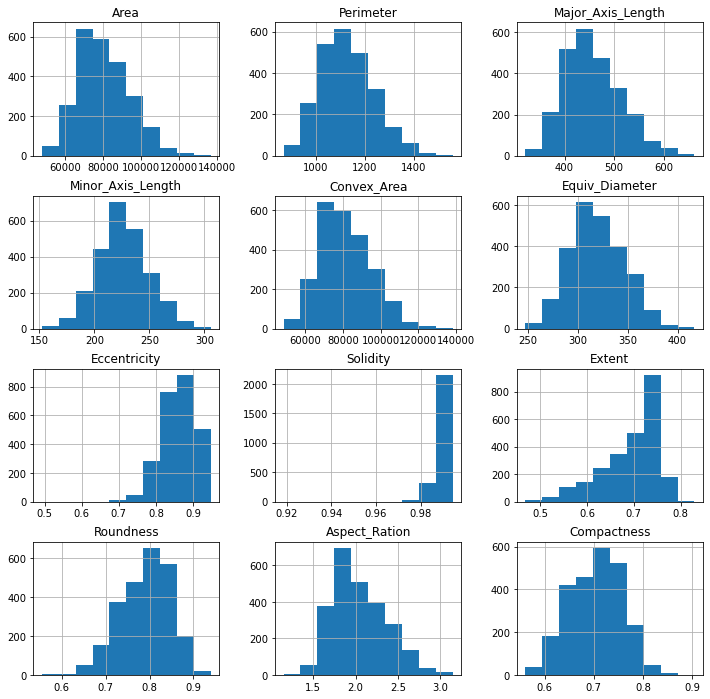

In [11]:
df.hist(figsize=(12,12))
plt.show()

In [12]:
def encode(x):
    if x == "Çerçevelik":
        return 0
    else:
        return 1

df["Class_encode"] = df.apply(lambda x: encode(x["Class"]), axis = 1)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,Class_encode
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik,0


In [13]:
y = df["Class_encode"]
x = df.drop(["Class", "Class_encode"], axis =1)

In [14]:
loj = sm.Logit(y,x)
lojmodel = loj.fit()
lojmodel.summary()

Optimization terminated successfully.
         Current function value: 0.283393
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Class_encode   No. Observations:                 2500
Model:                          Logit   Df Residuals:                     2488
Method:                           MLE   Df Model:                           11
Date:                Sat, 05 Mar 2022   Pseudo R-squ.:                  0.5907
Time:                        14:23:38   Log-Likelihood:                -708.48
converged:                       True   LL-Null:                       -1730.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Area                  0.0043      0.001      4.559      0.000       0.002       0.006
Perimeter            -0.0537      0.049     -1.097      0.272      -0.150       0.042
Major_Axis_Length     0.3862      0.091      4.224      0.000       0.207       0.565
Minor_Axis_Length     0.6561      0.119      5.496      0.000       0.422       0.890
Convex_Area          -0.0032      0.001     -3.349      0.001      -0.005      -0.001
Equiv_Diameter       -1.3710      0.205     -6.693      0.000      -1.772      -0.969
Eccentricity         48.0203     26.942      1.782      0.075      -4.786     100.826
Solidity             47.5873     64.371      0.739      0.460     -78.577     173.752
Extent                1.1112      1.361      0.816      0.414      -1.557       3.779
Roundness           -48.5176     35.910     -1.351      0.177    -118.900      21.865
Aspect_Ration         3.1971      5.743      0.557      0.578      -8.059      14.453
Compactness          41.7312     65.433      0.638      0.524     -86.515     169.977
=====================================================================================
"""

In [15]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver ="liblinear")
lojmodel = loj.fit(x,y)
lojmodel

LogisticRegression(solver='liblinear')

In [16]:
#R2degeri
lojmodel.score(x,y)

0.8804

In [17]:
#predict value
ypred = lojmodel.predict(x)

In [18]:
confusion_matrix(y, ypred)

array([[1191,  109],
       [ 190, 1010]], dtype=int64)

In [19]:
#Precision Score = TP/(TP+FP)
precision_score = 1191/(1191+190)

In [20]:
print('Precision: %.3f' % precision_score)

Precision: 0.862


In [21]:
#Recal Score = TP/(TP+FN)
recall_score = 1191/(1191+1010)

In [24]:
print('RecallScore: %.3f' % recall_score)

RecallScore: 0.541


In [25]:
#Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
accuracy_score = (1191+109)/(1191+109+190+1010)
print('Accuracy_score: %.3f' % accuracy_score)

Accuracy_score: 0.520


In [27]:
F1_Score = 2* precision_score*recall_score/(precision_score + recall_score)
F1_Score


0.6649916247906198

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =42)

In [ ]:
pip install scikit-plot

In [31]:
import scikitplot as skplt
predicted_probabilities = lojmodel.predict_proba(xtest)

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

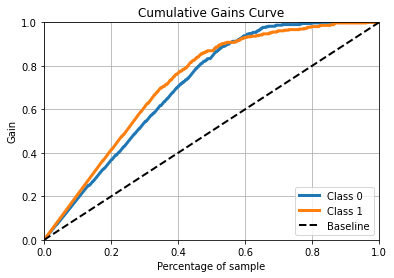

In [33]:
skplt.metrics.plot_cumulative_gain(ytest, predicted_probabilities)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

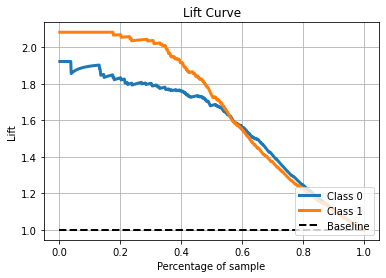

In [35]:
skplt.metrics.plot_lift_curve(ytest, predicted_probabilities)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNmodel = KNeighborsClassifier(n_neighbors=4)
KNmodel.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

In [37]:
predicted_probabilities2 = KNmodel.predict_proba(xtest)

In [38]:
fpr1, tpr1, thresh1 = roc_curve(ytest, predicted_probabilities[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(ytest, predicted_probabilities2[:,1], pos_label=1)


In [39]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

In [40]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, predicted_probabilities[:,1])
auc_score2 = roc_auc_score(ytest, predicted_probabilities2[:,1])

print(auc_score1, auc_score2)

0.9328561253561253 0.6904594017094017


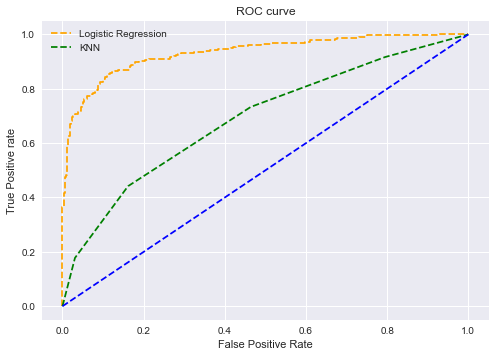

In [41]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();